In [20]:
%ls


Basics.ipynb          Week 10 Review.ipynb  hema_data.txt?dl=1


In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [22]:
df = pd.read_csv("hema_data.txt?dl=1",sep="\t",header=0, index_col=0)
df.head()

,CFU,poly,unk,int,mys,mid
gene,,,,,,
Mir682,13.657073,13.947856,0.137504,0.137504,0.137504,13.572700
Slc4a1,1.602704,9.729573,9.603170,4.856523,1.440708,0.534598
Tmem184a,0.881800,8.312915,8.838091,6.718636,1.058565,4.299882
Epb4.9,0.200265,8.066531,8.175530,6.895097,1.395968,4.562297
Mir3062,5.289897,0.137504,0.137504,6.542622,5.612211,0.137504


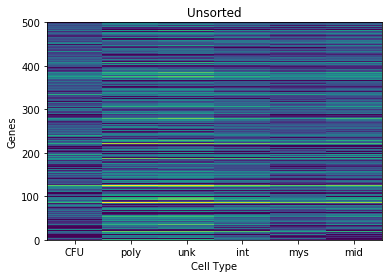

In [23]:
def plot_heatmap(df,title):
    plt.pcolor(df)
    plt.title(title)
    plt.xlabel("Cell Type")
    plt.ylabel("Genes")
    plt.xticks(np.arange(0.5,df.shape[1],1),df.columns);
plot_heatmap(df,"Unsorted")

In [24]:
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram 
Z=linkage(df)
idx=leaves_list(Z)
df=df.iloc[idx]
#X=X[idx] for numpy arrays
df.head()

,CFU,poly,unk,int,mys,mid
gene,,,,,,
Mir682,13.657073,13.947856,0.137504,0.137504,0.137504,13.572700
Mir3062,5.289897,0.137504,0.137504,6.542622,5.612211,0.137504
Beta-s,10.222321,15.298995,14.789827,13.863287,12.553317,12.910033
Ftl1,11.462497,15.331512,14.800930,12.759093,11.578972,12.303324
Slc4a1,1.602704,9.729573,9.603170,4.856523,1.440708,0.534598


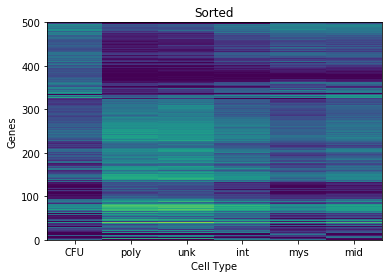

In [25]:
plot_heatmap(df,"Sorted")

In [26]:
x = df["CFU"]
y = df["poly"]
ngenes=df.shape[0]

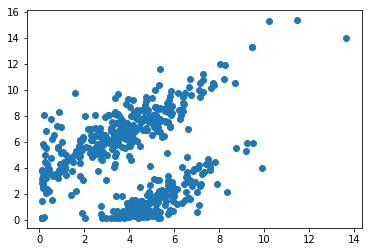

In [27]:
plt.scatter(x,y);

In [32]:
import random
#random.choice([0,1])
[i*3 for i in range(5)]

[0, 3, 6, 9, 12]

In [44]:
c = [random.choice([6,9]) for i in range(ngenes)]

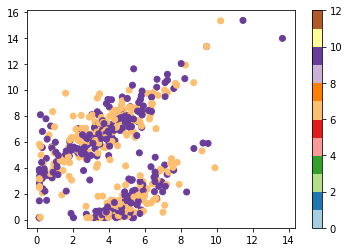

In [45]:
plt.scatter(x,y,c=c,cmap='Paired',vmin=0,vmax=12)
plt.colorbar()

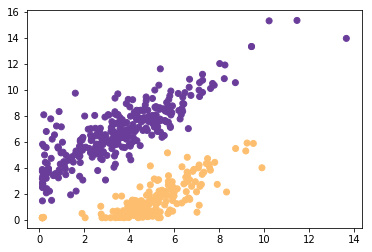

In [46]:
roi = y>x
c=np.zeros([ngenes]) + 6
c[roi]=9
plt.scatter(x,y,c=c,cmap='Paired',vmin=0,vmax=12);

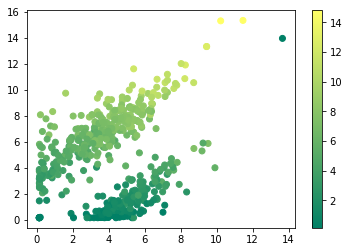

In [47]:
plt.scatter(x,y,c=df['unk'],cmap='summer');
plt.colorbar()

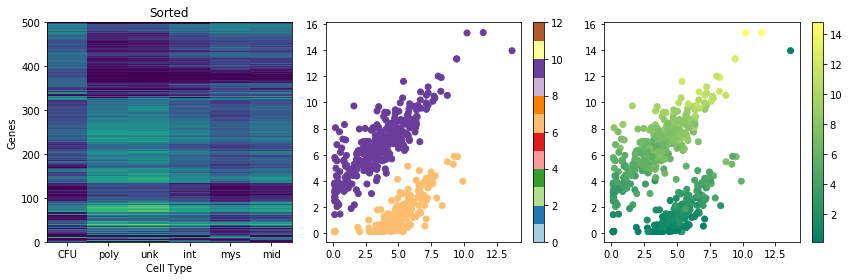

In [55]:
plt.figure(figsize=[12,4])
plt.subplot(1,3,1)
plot_heatmap(df,"Sorted")

plt.subplot(1,3,2)
roi = y>x
c=np.zeros([ngenes]) + 6
c[roi]=9
plt.scatter(x,y,c=c,cmap='Paired',vmin=0,vmax=12);
plt.colorbar()
plt.subplot(1,3,3);
plt.scatter(x,y,c=df['unk'],cmap='summer');
plt.colorbar()

plt.tight_layout();

plt.savefig("summary_fig.pdf")

In [56]:
%ls

Basics.ipynb          hema_data.txt?dl=1
Week 10 Review.ipynb  summary_fig.pdf


In [57]:
!open summary_fig.pdf